In [72]:
# 1. Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Show plots inline
%matplotlib inline


In [73]:

# 2. Load Dataset

df = pd.read_csv("C:\\Users\\HP\\Downloads\\rideshare_kaggle.csv\\rideshare_kaggle.csv")


print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (693071, 57)


,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [74]:

# 3. Basic Info & Cleaning

print(df.info())
print(df.isnull().sum())

# Drop duplicates
df = df.drop_duplicates()

# Fill missing price values with median
df["price"] = df["price"].fillna(df["price"].median())

# Convert timestamp to datetime
df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")


df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1970-01-01 00:00:01.544952607,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1970-01-01 00:00:01.543284023,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1970-01-01 00:00:01.543366822,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1970-01-01 00:00:01.543553582,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1970-01-01 00:00:01.543463360,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [75]:

# Check, fix, and use the datetime column
print("Columns in dataset:", df.columns)

# Rename the datetime column if needed (example: 'timestamp' → 'time_stamp')
if "timestamp" in df.columns:
    df.rename(columns={"timestamp": "time_stamp"}, inplace=True)
elif "date_time" in df.columns:
    df.rename(columns={"date_time": "time_stamp"}, inplace=True)
elif "Time_Stamp" in df.columns:
    df.rename(columns={"Time_Stamp": "time_stamp"}, inplace=True)

# Convert to datetime type
df["time_stamp"] = pd.to_datetime(df["time_stamp"])

# Extract features
df["hour"] = df["time_stamp"].dt.hour
df["dayofweek"] = df["time_stamp"].dt.day_name()

print(df.head())



Columns in dataset: Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
    

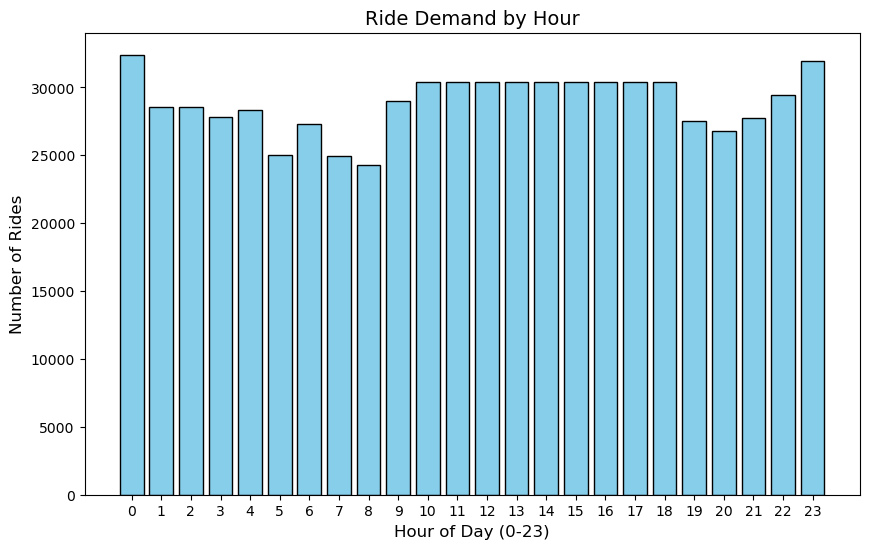

In [76]:
# 5. Exploratory Data Analysis



#(a) Ride count by hour
# Convert datetime column to pandas datetime type
df["datetime"] = pd.to_datetime(df["datetime"], errors="coerce")

# Extract hour
df["hour"] = df["datetime"].dt.hour

# Count rides per hour
hourly = df["hour"].value_counts().sort_index()

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(hourly.index, hourly.values, color="skyblue", edgecolor="black")
plt.title("Ride Demand by Hour", fontsize=14)
plt.xlabel("Hour of Day (0-23)", fontsize=12)
plt.ylabel("Number of Rides", fontsize=12)
plt.xticks(range(0,24))   # show all hours
plt.show()





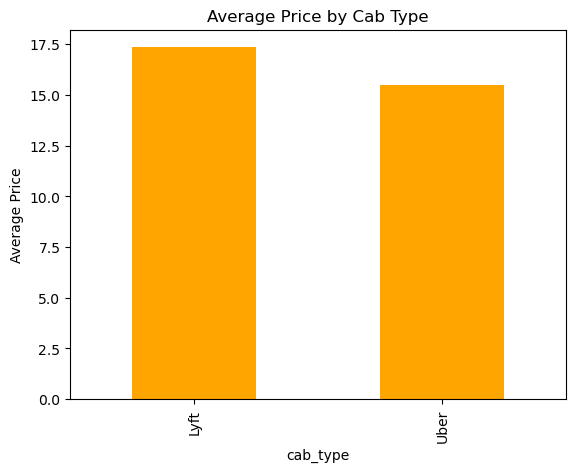

In [77]:
# (b) Average price by cab type
avg_price = df.groupby("cab_type")["price"].mean()
avg_price.plot(kind="bar", color="orange")
plt.title("Average Price by Cab Type")
plt.ylabel("Average Price")
plt.show()

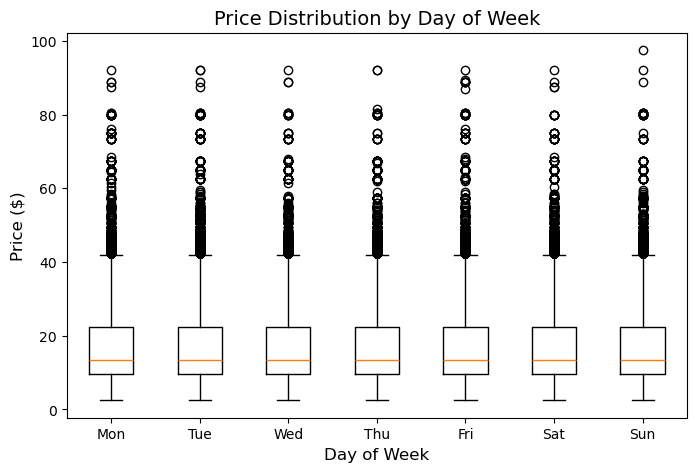

In [78]:
#c) price distribution by day of week

# 1) Make sure datetime is real
df["datetime"] = pd.to_datetime(df["datetime"], errors="coerce")

# 2) Create ordered day-of-week names
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
df["day_name"] = df["datetime"].dt.day_name()
df["day_name"] = pd.Categorical(df["day_name"], categories=day_order, ordered=True)

# 3) Keep only valid prices
dff = df.loc[pd.to_numeric(df["price"], errors="coerce").notna()].copy()
dff["price"] = dff["price"].astype(float)
dff = dff[dff["price"] > 0]           # optional but usually sensible

# 4) Build boxplot data in weekday order
data = [dff.loc[dff["day_name"] == d, "price"].values for d in day_order]

plt.figure(figsize=(8,5))
plt.boxplot(data, tick_labels=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], showfliers=True)
plt.title("Price Distribution by Day of Week", fontsize=14)
plt.xlabel("Day of Week", fontsize=12)
plt.ylabel("Price ($)", fontsize=12)
plt.grid(False)
plt.show()

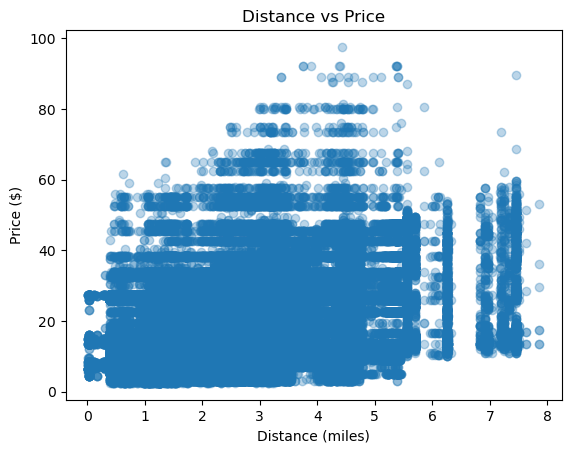

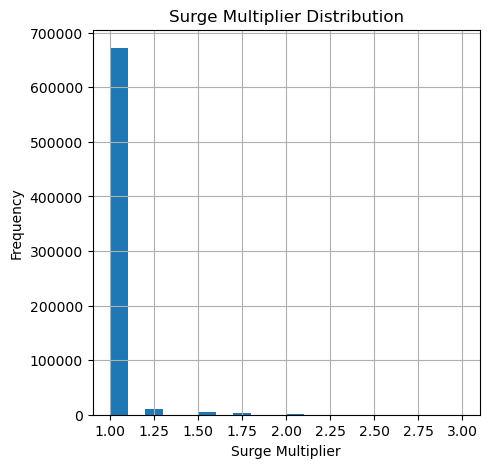

In [79]:
# (d) Distance vs Price scatter
plt.scatter(df["distance"], df["price"], alpha=0.3)
plt.title("Distance vs Price")
plt.xlabel("Distance (miles)")
plt.ylabel("Price ($)")
plt.show()

# (e) Surge multiplier distribution
df["surge_multiplier"].hist(bins=20, figsize=(5,5))
plt.title("Surge Multiplier Distribution")
plt.xlabel("Surge Multiplier")
plt.ylabel("Frequency")
plt.show()


In [80]:

# 6. Quick Insights

print("Top 5 Hours with Highest Ride Demand:")
print(hourly.sort_values(ascending=False).head())

print("\nAverage Price by Cab Type:")
print(avg_price)

print("\nCorrelation between Distance and Price:")
print(df[["distance","price"]].corr())


Top 5 Hours with Highest Ride Demand:
hour
0     32413
23    31931
18    30384
16    30384
10    30384
Name: count, dtype: int64

Average Price by Cab Type:
cab_type
Lyft    17.351396
Uber    15.467435
Name: price, dtype: float64

Correlation between Distance and Price:
          distance     price
distance  1.000000  0.328601
price     0.328601  1.000000
